In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets, UCR_UEA_datasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
from tslearn.metrics import dtw

from tslearn.utils import to_time_series, to_time_series_dataset

In [22]:
# 可視化メソッド
def plot_result(X_train, name):
    plt.figure(figsize=(12,5))

    # カラーマップを定義
    cmap = plt.get_cmap('tab10')  # タブルランカラーマップを使用
    colors = [cmap(i) for i in range(len(X_train))]

    for i, data in enumerate(X_train):
        plt.plot(data, label=f'data {i}', color=colors[i], alpha=0.8)
    
    dist = dtw(X_train[0], X_train[1])

    plt.text(x=0.1, y=0.1, s=f'dtw: {dist:.3f}', transform=plt.gca().transAxes,
            fontsize=20)

    plt.legend()
    # plt.text(0.05,0.95,'pred', transform=plt.gca().transAxes)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'{name}')

    plt.tight_layout()
    plt.show()

In [35]:
seed = 0
np.random.seed(seed)

# サンプルデータセット（この例ではItalyPowerデータセットを使用）
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset("Coffee")

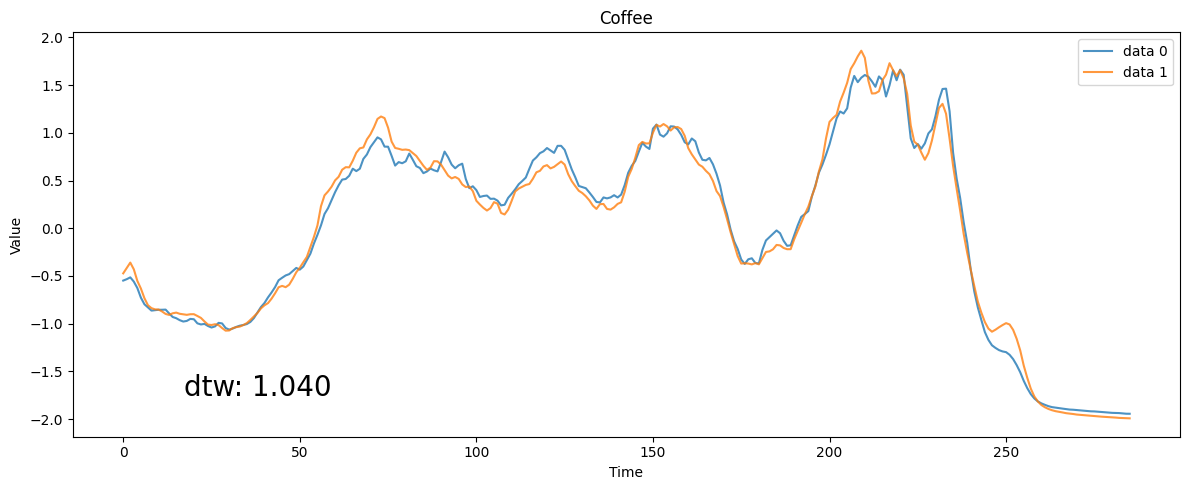

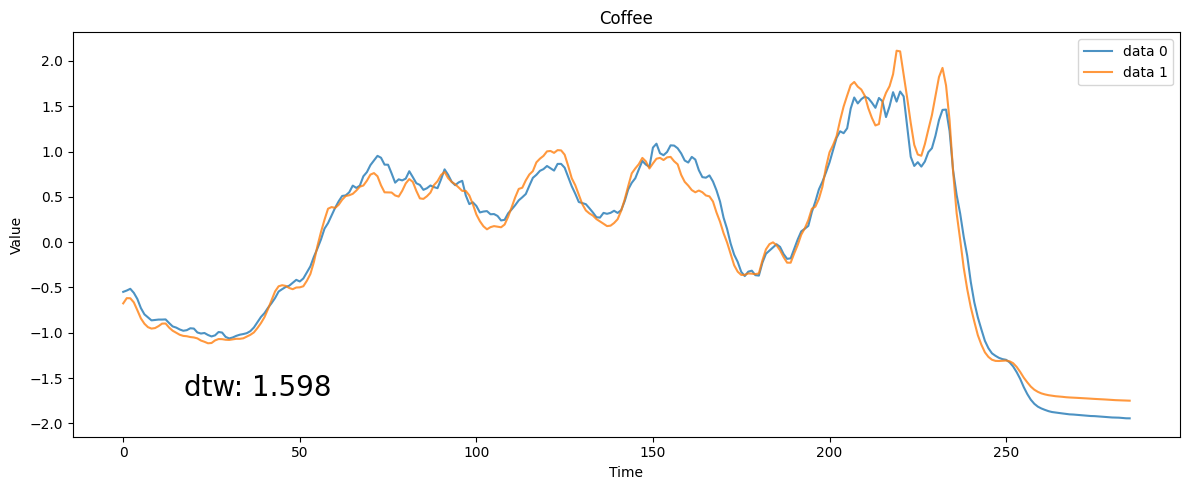

In [36]:
plot_result([X_train[1], X_train[2]], 'Coffee')
plot_result([X_train[1], X_train[-4]], 'Coffee')

系列長が不均一なデータを作成

In [39]:
seed = 0
np.random.seed(seed)

# 75~100%の範囲でランダムに系列長をリサンプリング
range_min = 0.75


# サンプルデータセット（この例ではItalyPowerデータセットを使用）
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset("Coffee")

# ランダムに系列長を選択（元の系列長から50%~100%の範囲でランダムに選択）
random_lengths = np.random.randint(range_min * X_train.shape[1], X_train.shape[1], size=X_train.shape[0])

# リサンプリング後のデータセットを格納するためのリスト
resampled_X = []

# 各データごとに系列長をリサンプリング
for i in range(X_train.shape[0]):
    data_point = X_train[i, :, :]
    
    # ランダムに選択された系列長にリサンプリング
    resampled_data_point = TimeSeriesResampler(sz=int(random_lengths[i])).fit_transform(data_point[:,0])

    resampled_X.append(resampled_data_point[0,:,0])

# リサンプリング後のデータセットをnumpy配列に変換
resampled_X = np.array(resampled_X)

# リサンプリング後のデータセットをTimeSeriesクラスに変換
# resampled_X = [to_time_series(data) for data in resampled_X]
resampled_X = to_time_series_dataset(resampled_X) # 不均一な系列長をNaNで埋める処理

/var/folders/mb/p6b6l_1j25q0m7n939wwqwk00000gn/T/ipykernel_41790/2824803275.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  resampled_X = np.array(resampled_X)


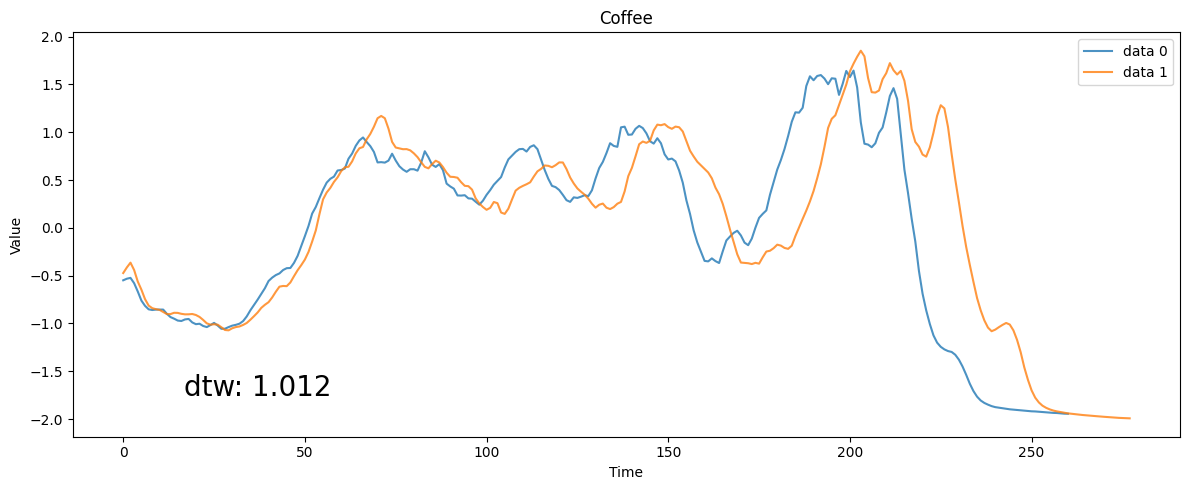

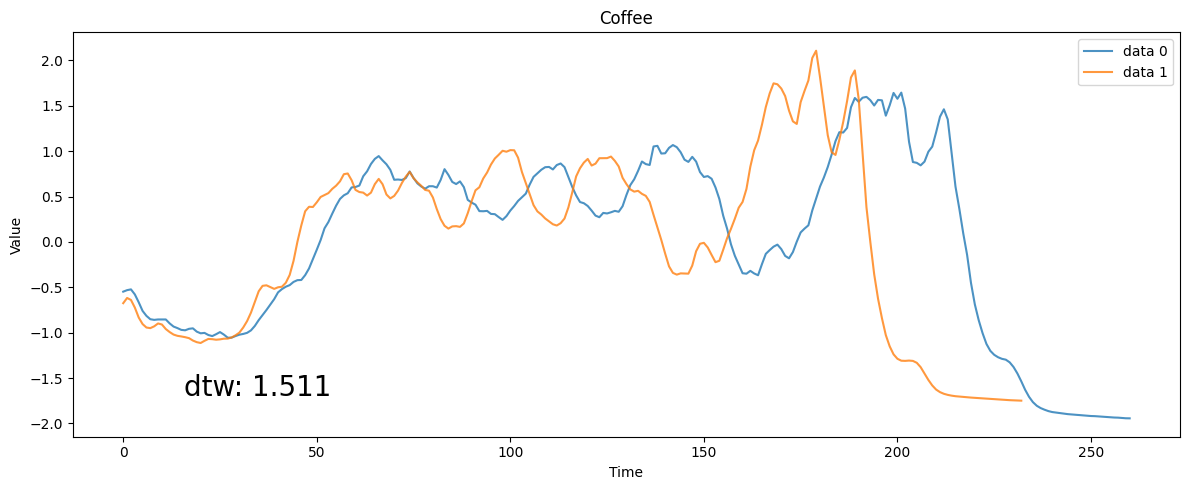

In [40]:
plot_result([resampled_X[1], resampled_X[2]], 'Coffee')
plot_result([resampled_X[1], resampled_X[-4]], 'Coffee')

系列長を不均一にしても、似ているものと似ていないものをしっかり評価できている

### 事前に標準化した場合

In [37]:
seed = 0
np.random.seed(seed)

# サンプルデータセット（この例ではItalyPowerデータセットを使用）
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset("Coffee")
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)


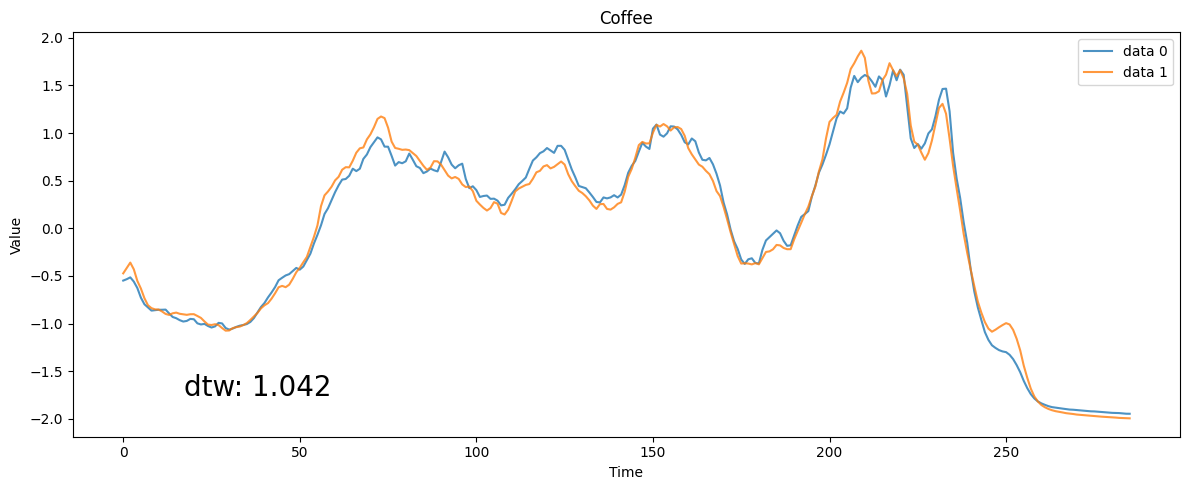

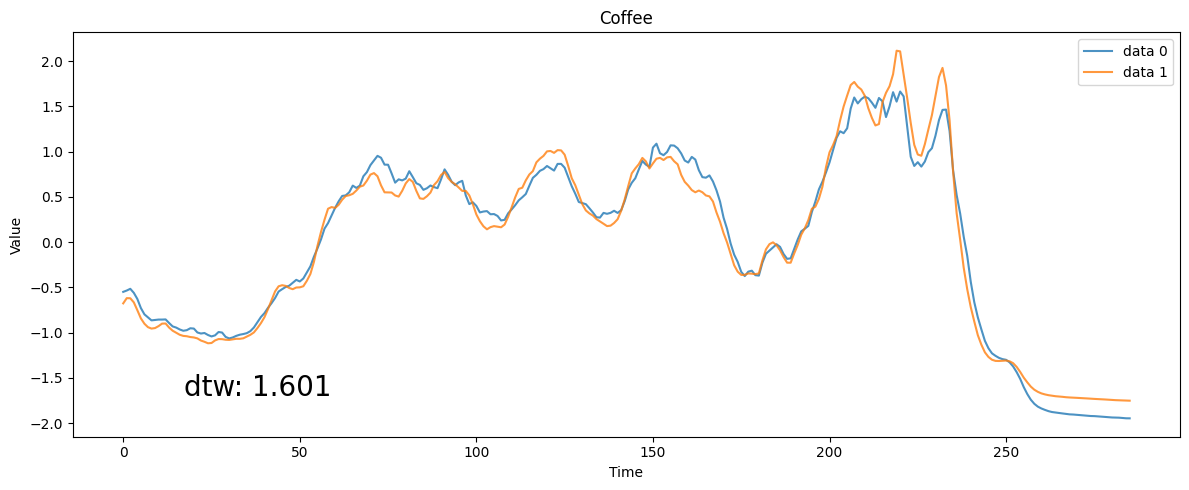

In [38]:
plot_result([X_train[1], X_train[2]], 'Coffee')
plot_result([X_train[1], X_train[-4]], 'Coffee')

In [41]:
seed = 0
np.random.seed(seed)

# 75~100%の範囲でランダムに系列長をリサンプリング
range_min = 0.75


# サンプルデータセット（この例ではItalyPowerデータセットを使用）
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset("Coffee")
# 標準化
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)

# ランダムに系列長を選択（元の系列長から50%~100%の範囲でランダムに選択）
random_lengths = np.random.randint(range_min * X_train.shape[1], X_train.shape[1], size=X_train.shape[0])

# リサンプリング後のデータセットを格納するためのリスト
resampled_X = []

# 各データごとに系列長をリサンプリング
for i in range(X_train.shape[0]):
    data_point = X_train[i, :, :]
    
    # ランダムに選択された系列長にリサンプリング
    resampled_data_point = TimeSeriesResampler(sz=int(random_lengths[i])).fit_transform(data_point[:,0])

    resampled_X.append(resampled_data_point[0,:,0])

# リサンプリング後のデータセットをnumpy配列に変換
resampled_X = np.array(resampled_X)

# リサンプリング後のデータセットをTimeSeriesクラスに変換
# resampled_X = [to_time_series(data) for data in resampled_X]
resampled_X = to_time_series_dataset(resampled_X) # 不均一な系列長をNaNで埋める処理

/var/folders/mb/p6b6l_1j25q0m7n939wwqwk00000gn/T/ipykernel_41790/305451191.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  resampled_X = np.array(resampled_X)


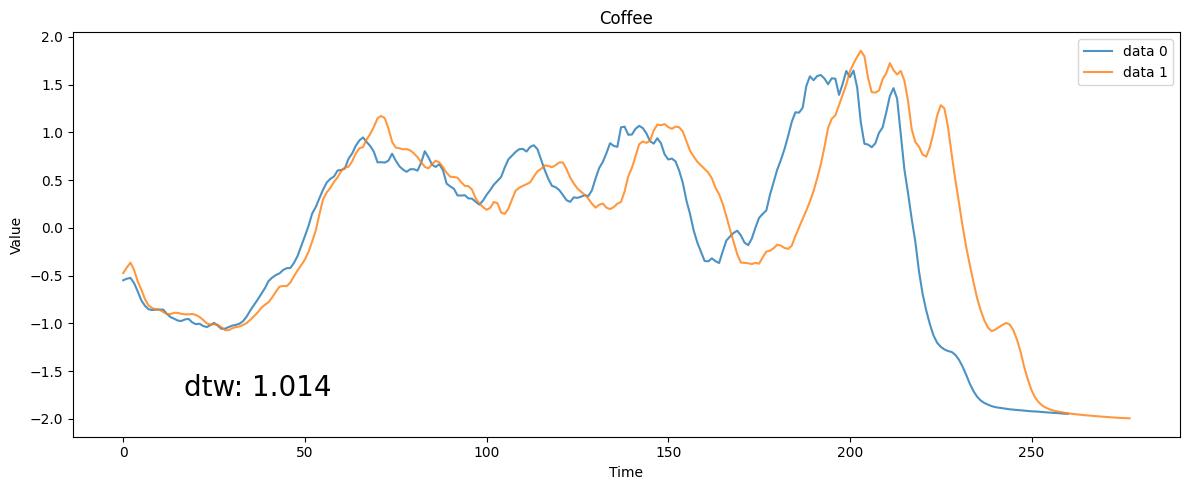

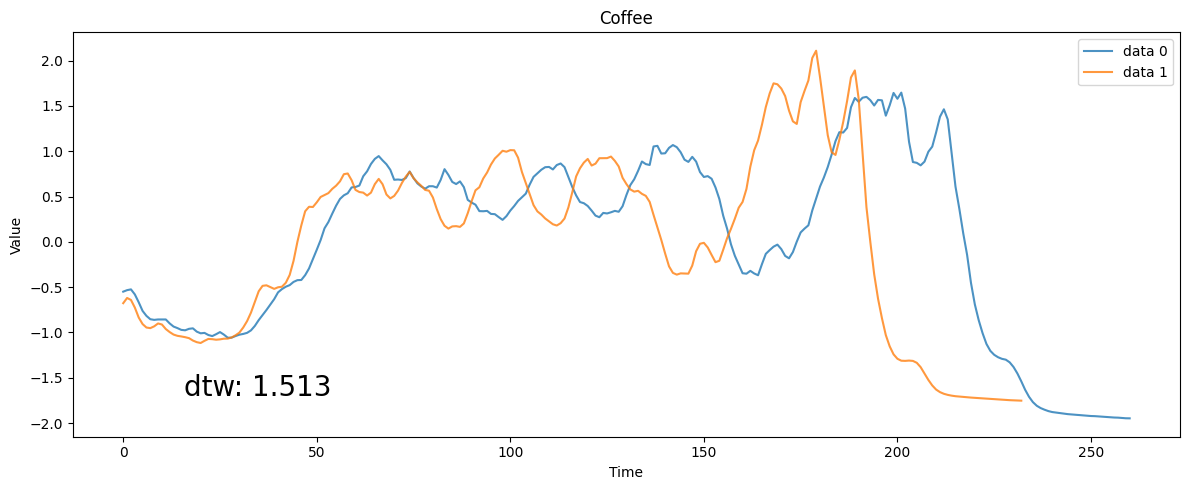

In [42]:
plot_result([resampled_X[1], resampled_X[2]], 'Coffee')
plot_result([resampled_X[1], resampled_X[-4]], 'Coffee')

事前に標準化しても、dtwの評価に影響は伺えない